In [74]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos
coursera_cou = pd.read_csv('Moocs/Coursera_courses.csv')
coursera_rev = pd.read_csv('Moocs/Coursera_reviews.csv')
edx = pd.read_csv('Moocs/edx_courses.csv')
udemy = pd.read_csv('Moocs/udemy_courses.csv')

Damos las primeras miradas a las tablas y buscamos datos nulos

In [3]:
coursera_cou.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
coursera_cou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [5]:
coursera_cou.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [6]:
coursera_rev.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [7]:
coursera_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [8]:
#Verificamos si hay nulos
coursera_rev.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [9]:
#Verificamos que no hayan valores atipicos en la columna rating
coursera_rev.sort_values(by='rating', ascending=False).head()

,reviews,reviewers,date_reviews,rating,course_id
1454710,G,By Reza S,"Aug 12, 2018",5,computer-networking
783268,I love it. Learnt a lot from this online course.,By Tan Y S,"May 12, 2020",5,search-engine-optimization
783274,One of my best course that I want to finish it .,By Fadli I,"Feb 10, 2016",5,search-engine-optimization
783273,Thank you so much for providing me this platform,By Simranjit S,"Oct 14, 2016",5,search-engine-optimization
783272,A very useful introduction to the basics of SEO.,By Alejandro F y B,"Sep 25, 2019",5,search-engine-optimization


In [10]:
coursera_rev.sort_values(by='rating', ascending=True).head()

,reviews,reviewers,date_reviews,rating,course_id
788581,The assignments had nothing to do with the lec...,By Nkechi O,"Oct 03, 2016",1,r-programming
1114705,"I already expressed this to Coursera, but I'll...",By Aaron P,"Aug 09, 2019",1,python-data-visualization
1114706,If this entire specialization were a bag of po...,By Morgan S,"Apr 06, 2016",1,python-data-visualization
1114707,"Very poor quality course, both from a content ...",By Brendan C,"May 02, 2019",1,python-data-visualization
1114708,peer grading for mentors very slow.,By Ayush B,"Feb 14, 2019",1,python-data-visualization


Nos basaremos en la columna rating para analizar los cursos de coursera

Seguimos con edx

In [11]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [12]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [13]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [14]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [15]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [16]:
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [17]:
#funcion para encontar outliers
def find_outliers(df, column, factor):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[~((df[column] >= Q1 - factor * IQR) & (df[column] <= Q3 + factor * IQR))]
    
    return outliers

In [18]:
#Eliminamos valores dupicadas
coursera_cou = coursera_cou.drop_duplicates()
coursera_rev = coursera_rev.drop_duplicates()
edx = edx.drop_duplicates()
udemy = udemy.drop_duplicates()

In [19]:
#Sacamos promedios y desviacion standar de rating por cada course_id en las tablas de coursera
promedios_coursera = pd.DataFrame(coursera_rev.groupby('course_id').mean())
promedios_coursera = promedios_coursera.reset_index()
promedios_coursera = promedios_coursera.rename(columns={'rating': 'promedios_coursera'})
std_coursera = pd.DataFrame(coursera_rev.groupby('course_id').std())
std_coursera = std_coursera.reset_index()
std_coursera = std_coursera.rename(columns={'rating': 'std_coursera'})

In [20]:
std_coursera.sort_values(by='std_coursera', ascending=False).head()

,course_id,std_coursera
601,write-your-first-novel,1.565248
26,attention-models-in-nlp,1.521278
328,japanese-1,1.517098
102,covid-19-contact-tracing-for-nursing-professio...,1.511858
438,project-execution,1.487420


In [21]:
coursera_rev[coursera_rev['course_id'] == 'write-your-first-novel']

,reviews,reviewers,date_reviews,rating,course_id
1240666,This was one of the worst classes I've ever ta...,By Shikha P,"Jun 01, 2020",1,write-your-first-novel
1240667,"Non-existant content, lack of usable feedback ...",By Leonie V,"Aug 04, 2020",1,write-your-first-novel
1240668,The lectures are nothing more than the “instru...,By R R,"Jul 28, 2020",1,write-your-first-novel
1240673,No teaching and no deadlines. Didn't work for ...,By Mare,"May 12, 2020",2,write-your-first-novel
1240674,"First 2 weeks of the program were great, reall...",By Gabriela H,"Jun 16, 2020",2,write-your-first-novel
1240679,I like the course structure and the videos. Bu...,By Dee K,"Aug 01, 2020",3,write-your-first-novel
1240682,"It's a very good course, it has a set structur...",By Growlithe,"Jun 16, 2020",4,write-your-first-novel
1240683,I would lessen the peer review number we have ...,By Mary H,"Sep 11, 2020",4,write-your-first-novel
1240684,"It was a great experience ,I really enjoyed it.",By Anwita P,"Apr 28, 2020",4,write-your-first-novel
1240685,Fantastic course! The lectures are easy to und...,By Tommy D,"Apr 14, 2020",5,write-your-first-novel


Como no tenemos la cantidad de ventas vamos a hacer una tabla con la cantidad de reviews en coursera

In [22]:
reviews_coursera = pd.DataFrame(coursera_rev.groupby('course_id').reviews.count())
reviews_coursera = reviews_coursera.reset_index()
reviews_coursera = reviews_coursera.rename(columns={'reviews': 'cantidad_reviews'})

In [23]:
reviews_coursera.sort_values(by='cantidad_reviews', ascending=False).head()

,course_id,cantidad_reviews
446,python,15226
344,machine-learning,12677
388,neural-networks-deep-learning,12291
532,technical-support-fundamentals,12054
339,learning-how-to-learn,11871


creamos una tabla general de coursera

In [24]:
coursera = pd.merge(coursera_cou, promedios_coursera, on='course_id')
coursera = pd.merge(coursera, std_coursera, on='course_id')
coursera = pd.merge(coursera, reviews_coursera, on='course_id')

In [25]:
coursera.head()

,name,institution,course_url,course_id,promedios_coursera,std_coursera,cantidad_reviews
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.739923,0.568967,12677
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.816438,0.500038,1460
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.929504,0.345969,8199
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.767482,0.601920,12054
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.818182,0.391675,33


In [26]:
coursera.to_csv('Moocs/coursera.csv')

In [27]:
#Creamos una columna con el nombre 'certificado' que contenga el precio del certificado en integer

def extract_numbers(text):
    numbers = re.findall(r'\d+', text)
    if numbers:
        return int(numbers[0])
    return None

edx['certificado'] = edx['price'].apply(extract_numbers)

In [28]:
# convertimos la columna n_enrolled en integer
edx['n_enrolled'] = edx['n_enrolled'].astype(str)
edx['n_enrolled'] = edx['n_enrolled'].apply(lambda x: x.replace(",", ""))

In [29]:
edx['n_enrolled'] = edx['n_enrolled'].apply(lambda x: x.replace('nan', '0'))

In [30]:
edx['n_enrolled'] = edx['n_enrolled'].astype(int)

In [31]:
#Verificamos que ningun valor sea menor a 0 en n_enrolled
edx.loc[edx['n_enrolled'] < 0]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certificado


In [32]:
edx.to_csv('Moocs/edx_nuevo.csv')

In [33]:
#buscamos outliers

#find_outliers(udemy, 'price', 1.5)
#find_outliers(udemy, 'num_subscribers', 1.5)
#find_outliers(udemy, 'num_reviews', 1.5)
#find_outliers(udemy, 'num_lectures', 1.5)
find_outliers(udemy, 'content_duration', 1.5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
35,434774,Options Trading Stocks: Proven Toolbox For Fin...,https://www.udemy.com/trading-stock-options-ii...,True,195,7884,118,68,Intermediate Level,10.0,2015-05-19T23:25:41Z,Business Finance
40,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,True,195,24481,2347,174,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance
42,1154754,Financial Modeling for Startups & Small Busine...,https://www.udemy.com/financial-modeling-for-s...,True,195,4991,137,79,Beginner Level,11.5,2017-03-29T22:36:05Z,Business Finance
44,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,True,200,20195,1113,227,All Levels,16.0,2014-10-27T22:01:36Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,576054,"WordPress Development - Themes, Plugins & Sing...",https://www.udemy.com/wordpress-development-cr...,True,150,817,164,131,Intermediate Level,19.5,2016-03-02T06:26:16Z,Web Development
3650,516790,HTML and CSS: A Guide to Web Design,https://www.udemy.com/html-and-css-a-guide-to-...,True,25,1557,13,74,All Levels,14.0,2015-06-02T22:41:13Z,Web Development
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,True,200,279,37,119,All Levels,10.0,2017-04-25T00:57:35Z,Web Development
3658,459922,The Complete Web Developer Course - Build 20 W...,https://www.udemy.com/the-complete-web-develop...,True,20,2650,61,304,All Levels,15.5,2015-03-26T22:11:15Z,Web Development


Ahora vamos a hacer un word cloud con las palabras mas repetidas en titulos

In [44]:
#Comprobamos que no hay titulos nulos

len(coursera[coursera['name'].isnull()].index)
#len(edx[edx['title'].isnull()].index)
#len(udemy[udemy['course_title'].isnull()].index)

0

In [72]:
#Unimos todos los titulos en un mismo dataframe
titulos = pd.DataFrame(columns=['title'])
lista = []
for i in range(len(coursera)):
    lista.append({'title': coursera.iloc[i]['name']})
for i in range(len(edx)):
    lista.append({'title': edx.iloc[i]['title']})
for i in range(len(udemy)):
    lista.append({'title': udemy.iloc[i]['course_title']})
titulos = pd.concat([titulos, pd.DataFrame(lista)], ignore_index=True)

In [73]:
titulos

,title
0,Machine Learning
1,Indigenous Canada
2,The Science of Well-Being
3,Technical Support Fundamentals
4,Become a CBRS Certified Professional Installer...
...,...
5245,Learn jQuery from Scratch - Master of JavaScri...
5246,How To Design A WordPress Website With No Codi...
5247,Learn and Build using Polymer
5248,CSS Animations: Create Amazing Effects on Your...


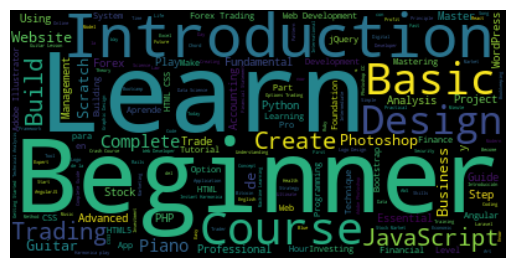

In [75]:
# Unir todas las palabras en una sola string
text_titulos = ' '.join(titulos['title'].tolist())

# Crear una nube de palabras a partir de la string de texto
wordcloud = WordCloud().generate(text_titulos)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()